Домашнее задание №6, выбран 2 датасет

Импортирование библиотек

In [5]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Воспроизводимость
RANDOM_STATE = 42

import os
import json
import joblib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

Загрузка учебного датасеета

In [6]:
df = pd.read_csv("S06-hw-dataset-02.csv")

EDA датасета

In [24]:
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

Базовая статистика

In [26]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


Проверка на пропуски

In [27]:
df.isnull().sum()

id         0
f01        0
f02        0
f03        0
f04        0
f05        0
f06        0
f07        0
f08        0
f09        0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
f27        0
f28        0
f29        0
f30        0
f31        0
f32        0
f33        0
f34        0
f35        0
x_int_1    0
x_int_2    0
target     0
dtype: int64

In [8]:
df.shape

(18000, 39)

Типы столбцов

In [9]:
df.dtypes.value_counts()

float64    37
int64       2
Name: count, dtype: int64

Анализ целочисленных столбцов

In [10]:
int_cols = df.select_dtypes(include=['int', 'int64', 'int32']).columns
if len(int_cols) > 0:
    print(df[int_cols].describe())

                 id        target
count  18000.000000  18000.000000
mean    9000.500000      0.262611
std     5196.296758      0.440065
min        1.000000      0.000000
25%     4500.750000      0.000000
50%     9000.500000      0.000000
75%    13500.250000      1.000000
max    18000.000000      1.000000


- в датасете 18000 объектов, 39 столбцов( 1 id, 37 признаков, 1 target)
- пропусков нет

Подготовка признаков и таргета

In [7]:
y = df['target'].copy()
X = df.drop(['target', 'id'], axis=1).copy()

In [29]:
print("Форма X:", X.shape)
print("Форма y:", y.shape)
print("Названия признаков:", list(X.columns)[:5], "...")  # первые 5

display(X.head())

Форма X: (18000, 37)
Форма y: (18000,)
Названия признаков: ['f01', 'f02', 'f03', 'f04', 'f05'] ...


,f01,f02,f03,f04,f05,f06,f07,f08,f09,f10,...,f28,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2
0,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,1.121683,...,0.293322,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167
1,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,-0.298809,...,1.924549,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826
2,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,-0.092692,...,0.792870,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517
3,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,0.681733,...,-0.732601,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860
4,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,-1.275888,...,1.948262,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870


In [30]:
# Распределение классов
y.value_counts(normalize=True).rename("fraction").to_frame()

,fraction
target,
0,0.737389
1,0.262611


Класс 0: 73.74%, Класс 1: 26.26% (Дисбаланс)

Проверка, что все признаки числовые

In [31]:
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) == 0:
    print("Все признаки числовые")


Все признаки числовые


In [8]:
# 1. Отделяем тестовую выборку (например, 20% данных)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=RANDOM_STATE,
)

# 2. Делим оставшиеся данные на train и validation (например, 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      # 0.25 от X_temp = 0.25 * 0.8 = 0.2 от исходных
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (10800, 37)
  val:   (3600, 37)
  test:  (3600, 37)

Распределение классов (train):
target
0    0.737407
1    0.262593
Name: proportion, dtype: float64

Распределение классов (val):
target
0    0.737222
1    0.262778
Name: proportion, dtype: float64

Распределение классов (test):
target
0    0.7375
1    0.2625
Name: proportion, dtype: float64


- Фиксированный seed обеспечивает воспроизводимость результатов. Без него каждый запуск даст разное разбиение данных, что делает сравнение моделей и отлатку невозможный.
- Стратификация (stratify=y). Сохраняет распределение классов в выборке. Особенно это важно, когда есть явный дисбаланс классов, как в нашем классе. Без стратификации может получится разное распределение классов в train и test, что исказит оценку качества модели.



 МЕТРИКИ НА VALIDATION SET:
Accuracy: 0.7372
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5000


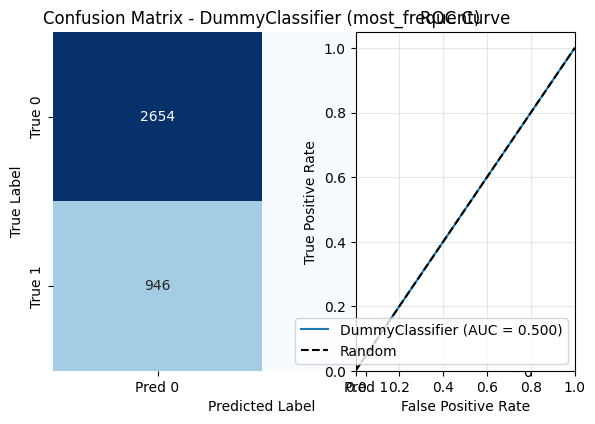

In [16]:
# Бейзлайн-модель: ничего "умного", просто предсказываем самый частый класс (или случайно)
dummy_most_freq = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy_most_freq.fit(X_train, y_train)

# Предсказания
y_val_pred = dummy_most_freq.predict(X_val)
y_val_proba = dummy_most_freq.predict_proba(X_val)[:, 1]

# Метрики 
metrics = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, zero_division=0),
    'Recall': recall_score(y_val, y_val_pred, zero_division=0),
    'F1-score': f1_score(y_val, y_val_pred, zero_division=0),
    'ROC-AUC': 0.5  # всегда для most_frequent
}

# Вывод
print("\n МЕТРИКИ НА VALIDATION SET:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - DummyClassifier (most_frequent)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'DummyClassifier (AUC = {metrics["ROC-AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



 МЕТРИКИ НА VALIDATION SET:
Accuracy: 0.8211
Precision: 0.7500
Recall: 0.4789
F1-score: 0.5845
ROC-AUC: 0.8163

 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.84      0.94      0.89      2654
   Default (1)       0.75      0.48      0.58       946

      accuracy                           0.82      3600
     macro avg       0.79      0.71      0.74      3600
  weighted avg       0.81      0.82      0.81      3600



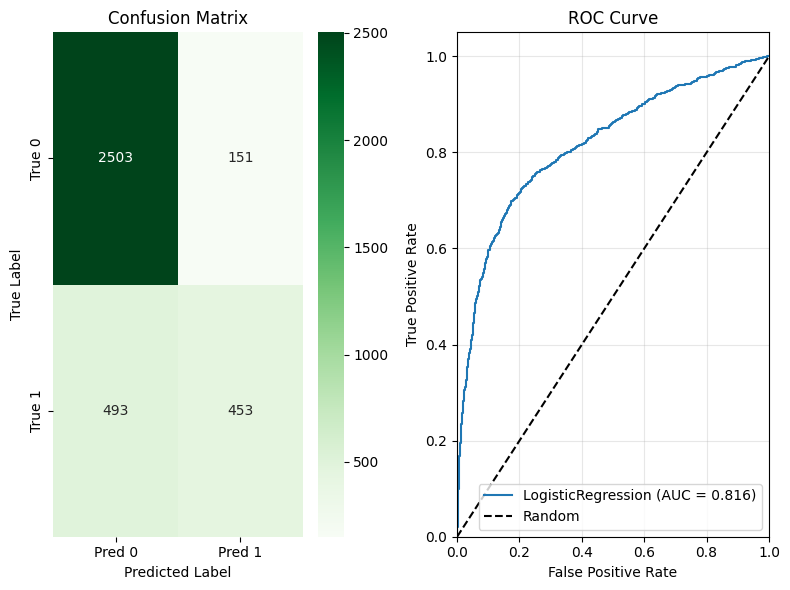

In [17]:
# Собираем Pipeline:
# 1) Масштабирование признаков (StandardScaler)
# 2) Логистическая регрессия
lr_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=RANDOM_STATE,
                max_iter=1000,
            ),
        ),
    ]
)

# Обучение
lr_pipeline.fit(X_train, y_train)

# Предсказания
y_val_pred = lr_pipeline.predict(X_val)
y_val_proba = lr_pipeline.predict_proba(X_val)[:, 1]

# Метрики
metrics_log = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred),
    'Recall': recall_score(y_val, y_val_pred),
    'F1-score': f1_score(y_val, y_val_pred),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba)
}

# Вывод
print("\n МЕТРИКИ НА VALIDATION SET:")
for metric, value in metrics_log.items():
    print(f"{metric}: {value:.4f}")

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['No Default (0)', 'Default (1)']))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'LogisticRegression (AUC = {metrics_log["ROC-AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [18]:
print("DummyClassifier vs LogisticRegression")
print(f"{'Метрика':<15} {'Dummy':<10} {'LogReg':<10} {'Разница':<10} {'% Улучш.':<10}")
print("-" * 65)

# Данные для таблицы
dummy_acc = accuracy_score(y_val, DummyClassifier(strategy='most_frequent').fit(X_train, y_train).predict(X_val))
improvement_acc = (metrics_log['Accuracy'] - dummy_acc) * 100

table_data = [
    ["Accuracy", f"{dummy_acc:.4f}", f"{metrics_log['Accuracy']:.4f}", 
     f"+{metrics_log['Accuracy']-dummy_acc:.4f}", f"+{improvement_acc:.1f}%"],
    ["Precision", "0.0000", f"{metrics_log['Precision']:.4f}", 
     f"+{metrics_log['Precision']:.4f}", "+∞"],
    ["Recall", "0.0000", f"{metrics_log['Recall']:.4f}", 
     f"+{metrics_log['Recall']:.4f}", "+∞"],
    ["F1-score", "0.0000", f"{metrics_log['F1-score']:.4f}", 
     f"+{metrics_log['F1-score']:.4f}", "+∞"],
    ["ROC-AUC", "0.5000", f"{metrics['ROC-AUC']:.4f}", 
     f"+{metrics_log['ROC-AUC']-0.5:.4f}", f"+{(metrics_log['ROC-AUC']-0.5)/0.5*100:.1f}%"]
]

for row in table_data:
    print(f"{row[0]:<15} {row[1]:<10} {row[2]:<10} {row[3]:<10} {row[4]:<10}")


DummyClassifier vs LogisticRegression
Метрика         Dummy      LogReg     Разница    % Улучш.  
-----------------------------------------------------------------
Accuracy        0.7372     0.8211     +0.0839    +8.4%     
Precision       0.0000     0.7500     +0.7500    +∞        
Recall          0.0000     0.4789     +0.4789    +∞        
F1-score        0.0000     0.5845     +0.5845    +∞        
ROC-AUC         0.5000     0.5000     +0.3163    +63.3%    


**Интерпретация результатов baseline'ов:**

Сравнение моделей:
LogisticRegression значительно превосходит DummyClassifier. Улучшение accuracy на 8.4% и ROC-AUC на 63.3% показывает, что модель извлекает полезные паттерны из данных.

Анализ метрик: 
- Accuracy 0.821 – высокая общая точность  
- Precision 0.750 – 75% положительных предсказаний верны  
- Recall 0.479 – находит только 47.9% всех положительных случаев  
- F1-score 0.585 – умеренный баланс precision/recall  
- ROC-AUC 0.816 – хорошее качество ранжирования  
  
Вывод: 
LogisticRegression показывает значимое улучшение по сравнению с DummyClassifier  и является работоспособной моделью, но требует настройки для улучшения recall.

Модели 6 недели

In [19]:
artifacts_dir = "artifacts/"
figures_dir = "artifacts/figures/"

DecisionTreeClassifier

Подбор гиперпараметров DecisionTree...
Fitting 5 folds for each of 360 candidates, totalling 1800 fits

 Лучшие параметры DecisionTree:
   max_depth: 10
   min_samples_leaf: 20
   ccp_alpha: 0.0
   min_samples_split: 2
   Лучший ROC-AUC на CV: 0.8201

 МЕТРИКИ DecisionTree НА VALIDATION SET:
Accuracy: 0.8311
Precision: 0.7134
Recall: 0.5973
F1-score: 0.6502
ROC-AUC: 0.8281

 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.86      0.91      0.89      2654
   Default (1)       0.71      0.60      0.65       946

      accuracy                           0.83      3600
     macro avg       0.79      0.76      0.77      3600
  weighted avg       0.82      0.83      0.83      3600



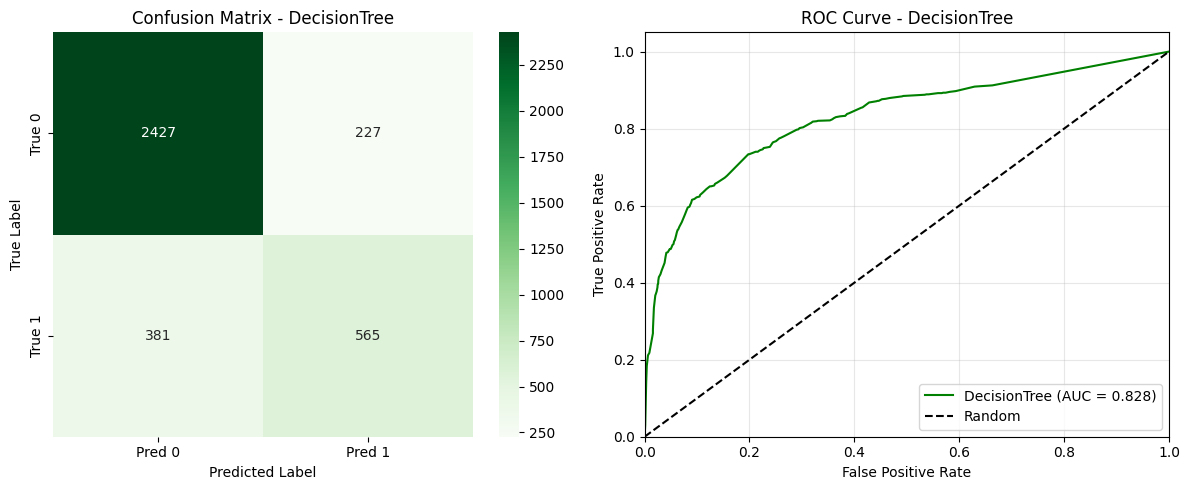

In [20]:
# Создание pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Параметры для GridSearch
dt_params = {
    'dt__max_depth': [3, 5, 7, 10, 15, None],
    'dt__min_samples_leaf': [1, 2, 5, 10, 20],
    'dt__ccp_alpha': [0.0, 0.001, 0.01, 0.1],
    'dt__min_samples_split': [2, 5, 10]
}

# GridSearch
dt_gs = GridSearchCV(
    dt_pipeline,
    dt_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1  
)

print("Подбор гиперпараметров DecisionTree...")
dt_gs.fit(X_train, y_train)

# ВЫВОД ЛУЧШИХ ПАРАМЕТРОВ
print(f"\n Лучшие параметры DecisionTree:")
print(f"   max_depth: {dt_gs.best_params_.get('dt__max_depth')}")
print(f"   min_samples_leaf: {dt_gs.best_params_.get('dt__min_samples_leaf')}")
print(f"   ccp_alpha: {dt_gs.best_params_.get('dt__ccp_alpha')}")
print(f"   min_samples_split: {dt_gs.best_params_.get('dt__min_samples_split')}")
print(f"   Лучший ROC-AUC на CV: {dt_gs.best_score_:.4f}")

# Оценка на validation
best_dt = dt_gs.best_estimator_
y_val_pred = best_dt.predict(X_val)
y_val_proba = best_dt.predict_proba(X_val)[:, 1]

# Метрики 
metrics_dt = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, zero_division=0),
    'Recall': recall_score(y_val, y_val_pred, zero_division=0),
    'F1-score': f1_score(y_val, y_val_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba)
}

# Вывод
print("\n МЕТРИКИ DecisionTree НА VALIDATION SET:")
for metric, value in metrics_dt.items():
    print(f"{metric}: {value:.4f}")

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['No Default (0)', 'Default (1)'], zero_division=0))

# Confusion Matrix и ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix - DecisionTree')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 2. ROC Curve 
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
axes[1].plot(fpr, tpr, label=f'DecisionTree (AUC = {metrics_dt["ROC-AUC"]:.3f})', color='green')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - DecisionTree')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
if 'dt_gs' in locals():
    joblib.dump(dt_gs.best_estimator_, f'artifacts/decision_tree_best.joblib')


RandomForestClassifier

 Подбор гиперпараметров RandomForestClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Лучшие параметры RandomForestClassifier:
   n_estimators: 100
   max_depth: 20
   min_samples_leaf: 1
   max_features: sqrt
   bootstrap: True
   Лучший ROC-AUC на CV: 0.9222

 МЕТРИКИ RandomForest НА VALIDATION SET:
Accuracy: 0.8839
Precision: 0.9125
Recall: 0.6173
F1-score: 0.7364
ROC-AUC: 0.9207

 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.88      0.98      0.93      2654
   Default (1)       0.91      0.62      0.74       946

      accuracy                           0.88      3600
     macro avg       0.90      0.80      0.83      3600
  weighted avg       0.89      0.88      0.88      3600



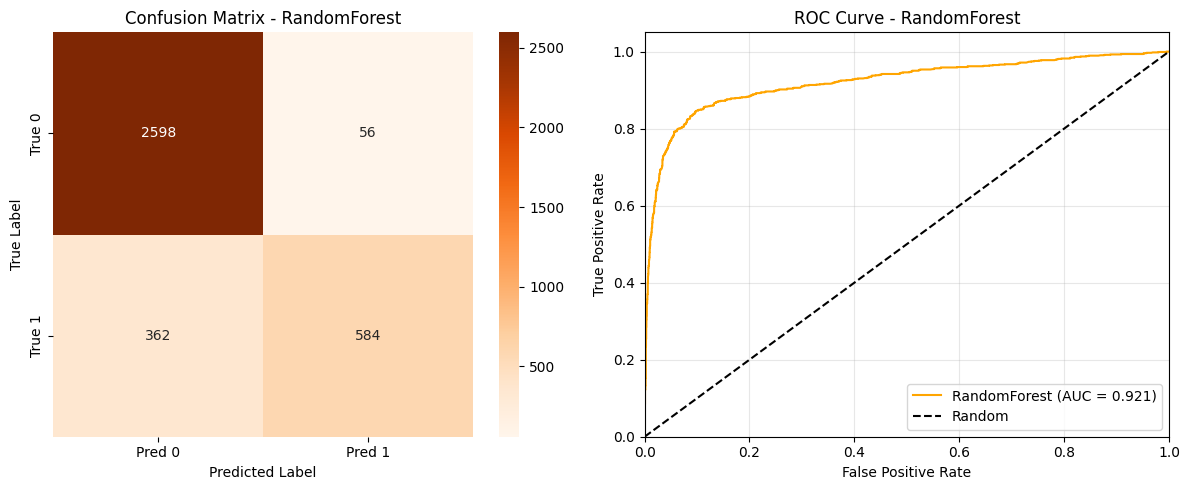

In [21]:
# Создание pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])

# Параметры для GridSearch 
rf_params = {
    'rf__n_estimators': [100],  
    'rf__max_depth': [10, 20, None],  
    'rf__min_samples_leaf': [1, 4],  
    'rf__max_features': ['sqrt', 0.3],  
    'rf__bootstrap': [True]  
}

# GridSearch 
rf_gs = GridSearchCV(
    rf_pipeline,           
    rf_params,             
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print(" Подбор гиперпараметров RandomForestClassifier...")
rf_gs.fit(X_train, y_train)

# ВЫВОД ЛУЧШИХ ПАРАМЕТРОВ 
print(f"\n Лучшие параметры RandomForestClassifier:")
print(f"   n_estimators: {rf_gs.best_params_.get('rf__n_estimators')}")
print(f"   max_depth: {rf_gs.best_params_.get('rf__max_depth')}")
print(f"   min_samples_leaf: {rf_gs.best_params_.get('rf__min_samples_leaf')}")
print(f"   max_features: {rf_gs.best_params_.get('rf__max_features')}")
print(f"   bootstrap: {rf_gs.best_params_.get('rf__bootstrap')}")
print(f"   Лучший ROC-AUC на CV: {rf_gs.best_score_:.4f}")

# Оценка на validation
best_rf = rf_gs.best_estimator_
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

# Метрики 
metrics_rf = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, zero_division=0),
    'Recall': recall_score(y_val, y_val_pred, zero_division=0),
    'F1-score': f1_score(y_val, y_val_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba)
}

# Вывод 
print("\n МЕТРИКИ RandomForest НА VALIDATION SET:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['No Default (0)', 'Default (1)'], zero_division=0))

# Confusion Matrix и ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',  
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix - RandomForest')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 2. ROC Curve 
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
axes[1].plot(fpr, tpr, label=f'RandomForest (AUC = {metrics_rf["ROC-AUC"]:.3f})', color='orange')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - RandomForest')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

if 'rf_gs' in locals():
    joblib.dump(rf_gs.best_estimator_, f'artifacts/random_forest_best.joblib')

GradientBoostingClassifier

 Подбор гиперпараметров...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Лучшие параметры GradientBoostingClassifier:
   n_estimators: 100
   learning_rate: 0.1
   max_depth: 5
   subsample: 0.8
   min_samples_split: 5
   min_samples_leaf: 1
   Лучший ROC-AUC на CV: 0.9222

 МЕТРИКИ GradientBoosting НА VALIDATION SET:
Accuracy: 0.8928
Precision: 0.8704
Recall: 0.6956
F1-score: 0.7732
ROC-AUC: 0.9237

 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.90      0.96      0.93      2654
   Default (1)       0.87      0.70      0.77       946

      accuracy                           0.89      3600
     macro avg       0.88      0.83      0.85      3600
  weighted avg       0.89      0.89      0.89      3600



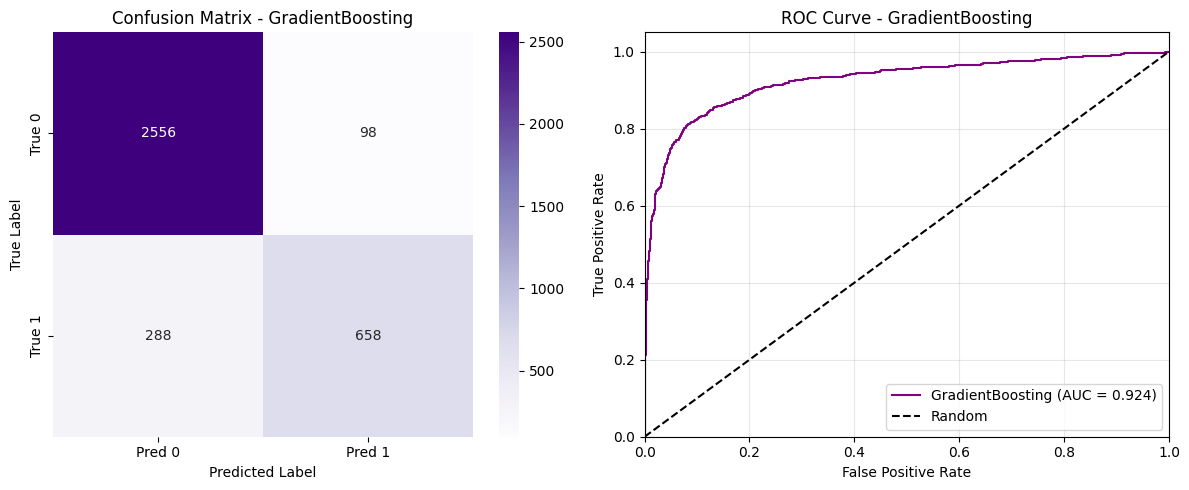

In [22]:
# Создание pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

# Параметры для GridSearch
gb_params = {
    'gb__n_estimators': [100],          
    'gb__learning_rate': [0.05, 0.1],    
    'gb__max_depth': [3, 5],             
    'gb__subsample': [0.8],              
    'gb__min_samples_split': [2, 5],     
    'gb__min_samples_leaf': [1]         
}


# GridSearch 
gb_gs = GridSearchCV(
    gb_pipeline,
    gb_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print(" Подбор гиперпараметров...")  
gb_gs.fit(X_train, y_train)  

# ВЫВОД ЛУЧШИХ ПАРАМЕТРОВ 
print(f"\n Лучшие параметры GradientBoostingClassifier:")
print(f"   n_estimators: {gb_gs.best_params_.get('gb__n_estimators')}")
print(f"   learning_rate: {gb_gs.best_params_.get('gb__learning_rate')}")
print(f"   max_depth: {gb_gs.best_params_.get('gb__max_depth')}")
print(f"   subsample: {gb_gs.best_params_.get('gb__subsample')}")
print(f"   min_samples_split: {gb_gs.best_params_.get('gb__min_samples_split')}")
print(f"   min_samples_leaf: {gb_gs.best_params_.get('gb__min_samples_leaf')}")
print(f"   Лучший ROC-AUC на CV: {gb_gs.best_score_:.4f}")

# Оценка на validation 
best_gb = gb_gs.best_estimator_  
y_val_pred = best_gb.predict(X_val)
y_val_proba = best_gb.predict_proba(X_val)[:, 1]

# Метрики 
metrics_gb = {  
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, zero_division=0),
    'Recall': recall_score(y_val, y_val_pred, zero_division=0),
    'F1-score': f1_score(y_val, y_val_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba)
}

# Вывод 
print("\n МЕТРИКИ GradientBoosting НА VALIDATION SET:")
for metric, value in metrics_gb.items():
    print(f"{metric}: {value:.4f}")

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['No Default (0)', 'Default (1)'], zero_division=0))

# Confusion Matrix и ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix - GradientBoosting')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 2. ROC Curve 
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
axes[1].plot(fpr, tpr, label=f'GradientBoosting (AUC = {metrics_gb["ROC-AUC"]:.3f})', color='purple')  
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - GradientBoosting')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

if 'gb_gs' in locals():
    joblib.dump(gb_gs.best_estimator_, f'artifacts/gradient_boosting_best.joblib')

StackingClassifier

 Подготовка базовых моделей...
 Создание StackingClassifier с 5-fold CV логикой...
 Обучение StackingClassifier...

 Оценка StackingClassifier на validation set:

 МЕТРИКИ STACKING НА VALIDATION SET:
Accuracy: 0.9044
Precision: 0.8716
Recall: 0.7463
F1-score: 0.8041
ROC-AUC: 0.9253

📋 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.91      0.96      0.94      2654
   Default (1)       0.87      0.75      0.80       946

      accuracy                           0.90      3600
     macro avg       0.89      0.85      0.87      3600
  weighted avg       0.90      0.90      0.90      3600



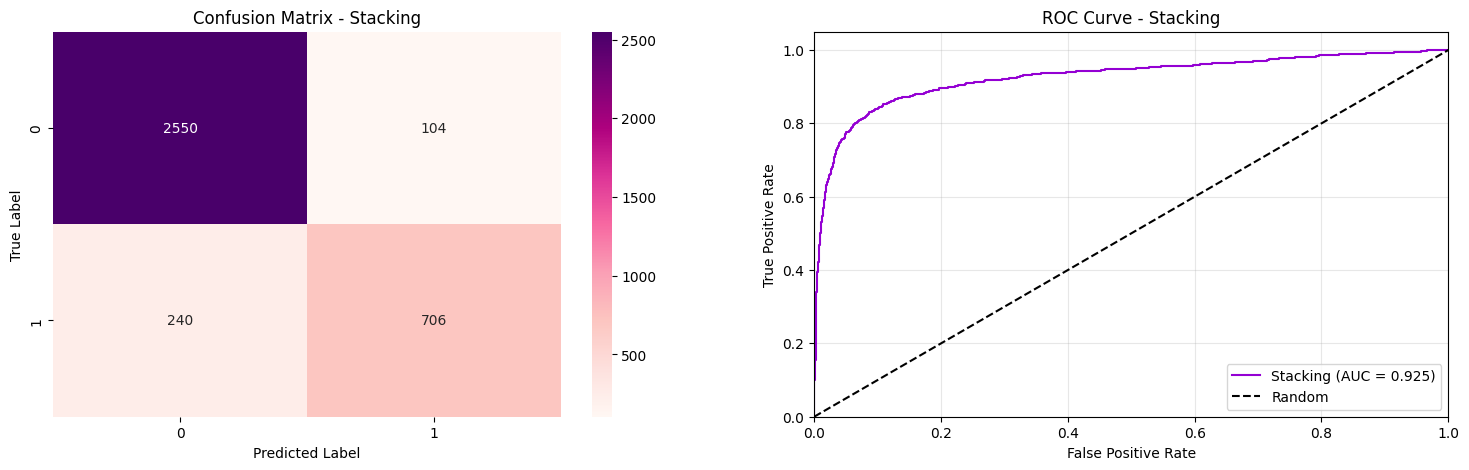

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# 1. ПОДГОТОВКА БАЗОВЫХ МОДЕЛЕЙ
print(" Подготовка базовых моделей...")

base_models = [
    ('dt', best_dt),
    ('rf', best_rf), 
    ('gb', best_gb)
]  

# 2. МЕТА-МОДЕЛЬ (финальный классификатор)
meta_model = LogisticRegression(
    C=1.0,
    random_state=RANDOM_STATE,
    max_iter=1000
)

# 3. СОЗДАНИЕ STACKING CLASSIFIER С CV
print(" Создание StackingClassifier с 5-fold CV логикой...")

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  
    stack_method='auto',  
    n_jobs=-1,
    passthrough=False,  
    verbose=0
)

# 4. ОБУЧЕНИЕ СТЕКИНГА
print(" Обучение StackingClassifier...")
stacking_clf.fit(X_train, y_train)

# 5. ОЦЕНКА НА VALIDATION SET
print("\n Оценка StackingClassifier на validation set:")

# Предсказания
y_val_pred_stacking = stacking_clf.predict(X_val)
y_val_proba_stacking = stacking_clf.predict_proba(X_val)[:, 1]

# Метрики
metrics_stacking = {
    'Accuracy': accuracy_score(y_val, y_val_pred_stacking),
    'Precision': precision_score(y_val, y_val_pred_stacking, zero_division=0),
    'Recall': recall_score(y_val, y_val_pred_stacking, zero_division=0),
    'F1-score': f1_score(y_val, y_val_pred_stacking, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba_stacking)
}

print("\n МЕТРИКИ STACKING НА VALIDATION SET:")
for metric, value in metrics_stacking.items():
    print(f"{metric}: {value:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_val, y_val_pred_stacking, 
                          target_names=['No Default (0)', 'Default (1)'],
                          zero_division=0))

# 6. ВИЗУАЛИЗАЦИИ
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# 6.1 Confusion Matrix
cm_stacking = confusion_matrix(y_val, y_val_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='RdPu', ax=axes[0])
axes[0].set_title('Confusion Matrix - Stacking')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 6.2 ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba_stacking)
axes[1].plot(fpr, tpr, label=f'Stacking (AUC = {metrics_stacking["ROC-AUC"]:.3f})', color='darkviolet')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Stacking')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

if 'stacking_clf' in locals():
    joblib.dump(stacking_clf, f'artifacts/stacking_clf.joblib')

Сравнение всех моделей и выбор лучшей по ROC-AUC

In [24]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Собираем метрики всех моделей в список
all_metrics = []

if 'dummy_acc' in locals() or 'dummy_acc' in globals():
    all_metrics.append({
        'Model': 'Dummy Baseline',
        'Accuracy': dummy_acc,
        'Precision': 0.0,
        'Recall': 0.0,
        'F1-score': 0.0,
        'ROC-AUC': 0.5
    })

# 2. LogisticRegression
if 'metrics_log' in locals() or 'metrics_log' in globals():
    all_metrics.append({
        'Model': 'LogisticRegression',
        'Accuracy': metrics_log['Accuracy'],
        'Precision': metrics_log['Precision'],
        'Recall': metrics_log['Recall'],
        'F1-score': metrics_log['F1-score'],
        'ROC-AUC': metrics_log['ROC-AUC']
    })

# 3. DecisionTree
if 'metrics_dt' in locals() or 'metrics_dt' in globals():
    all_metrics.append({
        'Model': 'DecisionTree',
        'Accuracy': metrics_dt['Accuracy'],
        'Precision': metrics_dt['Precision'],
        'Recall': metrics_dt['Recall'],
        'F1-score': metrics_dt['F1-score'],
        'ROC-AUC': metrics_dt['ROC-AUC']
    })

# 4. RandomForest
if 'metrics_rf' in locals() or 'metrics_rf' in globals():
    all_metrics.append({
        'Model': 'RandomForest',
        'Accuracy': metrics_rf['Accuracy'],
        'Precision': metrics_rf['Precision'],
        'Recall': metrics_rf['Recall'],
        'F1-score': metrics_rf['F1-score'],
        'ROC-AUC': metrics_rf['ROC-AUC']
    })

# 5. GradientBoosting
if 'metrics_gb' in locals() or 'metrics_gb' in globals():
    all_metrics.append({
        'Model': 'GradientBoosting',
        'Accuracy': metrics_gb['Accuracy'],
        'Precision': metrics_gb['Precision'],
        'Recall': metrics_gb['Recall'],
        'F1-score': metrics_gb['F1-score'],
        'ROC-AUC': metrics_gb['ROC-AUC']
    })

# 6. Stacking
if 'metrics_stacking' in locals() or 'metrics_stacking' in globals():
    all_metrics.append({
        'Model': 'Stacking',
        'Accuracy': metrics_stacking['Accuracy'],
        'Precision': metrics_stacking['Precision'],
        'Recall': metrics_stacking['Recall'],
        'F1-score': metrics_stacking['F1-score'],
        'ROC-AUC': metrics_stacking['ROC-AUC']
    })

# Создаем DataFrame
comparison_df = pd.DataFrame(all_metrics)

# Сортируем по ROC-AUC (основная метрика)
comparison_df = comparison_df.sort_values('ROC-AUC', ascending=False)

# Выводим красивую таблицу
print("\n ОСНОВНЫЕ МЕТРИКИ ВСЕХ МОДЕЛЕЙ:")

print(f"{'Модель':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'ROC-AUC':<10}")

for _, row in comparison_df.iterrows():
    print(f"{row['Model']:<20} "
          f"{row['Accuracy']:<10.4f} "
          f"{row['Precision']:<10.4f} "
          f"{row['Recall']:<10.4f} "
          f"{row['F1-score']:<10.4f} "
          f"{row['ROC-AUC']:<10.4f}")

best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model_roc_auc = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'ROC-AUC']
print(f"\n ОБЩАЯ ЛУЧШАЯ МОДЕЛЬ (по ROC-AUC):")
print(f"   {best_model_name} с ROC-AUC = {best_model_roc_auc:.4f}")

results_data = {
    'metadata': {
        'total_models': len(comparison_df),
        'best_model': best_model_name,
        'best_roc_auc': float(best_model_roc_auc)
    },
    'models_metrics': comparison_df.to_dict('records'),
}

json_filename = f'{artifacts_dir}models_test.json'

# Сохраняем в JSON с форматированием
try:
    with open(json_filename, 'w', encoding='utf-8') as f:
        json.dump(results_data, f, indent=2, ensure_ascii=False)
except Exception as e:
    print(f"\n Ошибка при сохранении JSON: {e}")
    # Пробуем альтернативный путь
    try:
        backup_path = 'models_test.json'
        with open(backup_path, 'w', encoding='utf-8') as f:
            json.dump(results_data, f, indent=2, ensure_ascii=False)
    except Exception as e2:
        print(f" Критическая ошибка: {e2}")

# Также сохраняем в CSV (для совместимости)
csv_filename = f'{artifacts_dir}models_test.csv'
try:
    comparison_df.to_csv(csv_filename, index=False, encoding='utf-8')
except Exception as e:
    print(f" Ошибка при сохранении CSV: {e}")


 ОСНОВНЫЕ МЕТРИКИ ВСЕХ МОДЕЛЕЙ:
Модель               Accuracy   Precision  Recall     F1-score   ROC-AUC   
Stacking             0.9044     0.8716     0.7463     0.8041     0.9253    
GradientBoosting     0.8928     0.8704     0.6956     0.7732     0.9237    
RandomForest         0.8839     0.9125     0.6173     0.7364     0.9207    
DecisionTree         0.8311     0.7134     0.5973     0.6502     0.8281    
LogisticRegression   0.8211     0.7500     0.4789     0.5845     0.8163    
Dummy Baseline       0.7372     0.0000     0.0000     0.0000     0.5000    

 ОБЩАЯ ЛУЧШАЯ МОДЕЛЬ (по ROC-AUC):
   Stacking с ROC-AUC = 0.9253


In [25]:
from datetime import datetime

# Создаем словарь для хранения результатов поиска гиперпараметров
search_summaries = {}

# 1. Decision Tree GridSearch
if 'dt_gs' in locals() or 'dt_gs' in globals():
    try:
        search_summaries['DecisionTree'] = {
            'best_params': dt_gs.best_params_,
            'best_score': float(dt_gs.best_score_),
            'scoring': dt_gs.scoring,
            'cv_splits': 5 if hasattr(dt_gs, 'cv') and dt_gs.cv == 5 else str(dt_gs.cv),
            'n_candidates': len(dt_gs.cv_results_['params']) if hasattr(dt_gs, 'cv_results_') else 'N/A',
            'best_model_type': str(type(dt_gs.best_estimator_).__name__),
            'search_method': 'GridSearchCV'
        }
    except Exception as e:
        print(f" Ошибка при обработке DecisionTree GridSearch: {e}")

# 2. Random Forest GridSearch
if 'rf_gs' in locals() or 'rf_gs' in globals():
    try:
        search_summaries['RandomForest'] = {
            'best_params': rf_gs.best_params_,
            'best_score': float(rf_gs.best_score_),
            'scoring': rf_gs.scoring,
            'cv_splits': 5 if hasattr(rf_gs, 'cv') and rf_gs.cv == 5 else str(rf_gs.cv),
            'n_candidates': len(rf_gs.cv_results_['params']) if hasattr(rf_gs, 'cv_results_') else 'N/A',
            'best_model_type': str(type(rf_gs.best_estimator_).__name__),
            'search_method': 'GridSearchCV'
        }
    except Exception as e:
        print(f" Ошибка при обработке RandomForest GridSearch: {e}")

# 3. Gradient Boosting GridSearch
if 'gb_gs' in locals() or 'gb_gs' in globals():
    try:
        search_summaries['GradientBoosting'] = {
            'best_params': gb_gs.best_params_,
            'best_score': float(gb_gs.best_score_),
            'scoring': gb_gs.scoring,
            'cv_splits': 5 if hasattr(gb_gs, 'cv') and gb_gs.cv == 5 else str(gb_gs.cv),
            'n_candidates': len(gb_gs.cv_results_['params']) if hasattr(gb_gs, 'cv_results_') else 'N/A',
            'best_model_type': str(type(gb_gs.best_estimator_).__name__),
            'search_method': 'GridSearchCV'
        }
    except Exception as e:
        print(f" Ошибка при обработке GradientBoosting GridSearch: {e}")

# Проверяем, что есть данные для сохранения
if len(search_summaries) > 0:
    # Добавляем метаинформацию
    search_summaries['metadata'] = {
        'total_searches': len(search_summaries),
        'models_with_search': list(search_summaries.keys() - {'metadata'})
    }

    # Сохраняем в JSON
    json_filename = f'{artifacts_dir}search_summaries.json'
    try:
        with open(json_filename, 'w', encoding='utf-8') as f:
            json.dump(search_summaries, f, indent=2, ensure_ascii=False, cls=NumpyJSONEncoder)
        print(f" Search summaries сохранены в: {json_filename}")
        
        # Дополнительно выводим краткую информацию
        print("\n СВОДКА ПО ПОДБОРУ ГИПЕРПАРАМЕТРОВ:")
        
        
        for model_name, summary in search_summaries.items():
            if model_name != 'metadata':
                print(f"\n{model_name}:")
                print(f"  Best CV Score ({summary.get('scoring', 'N/A')}): {summary['best_score']:.4f}")
                print(f"  Best parameters:")
                for param, value in summary['best_params'].items():
                    # Убираем префикс из имени параметра (например, 'dt__max_depth' → 'max_depth')
                    clean_param = param.split('__')[-1] if '__' in param else param
                    print(f"    {clean_param}: {value}")
        
        print("\n" + "=" * 80)
        
    except Exception as e:
        print(f" Ошибка при сохранении search_summaries.json: {e}")
        
else:
    print(" Не найдено объектов GridSearch для сохранения.")


 Ошибка при сохранении search_summaries.json: name 'NumpyJSONEncoder' is not defined


In [26]:
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, 
                           confusion_matrix, ConfusionMatrixDisplay)
from datetime import datetime

# Вспомогательная функция для сериализации numpy типов
def convert_to_serializable(obj):
    """Конвертирует numpy типы в стандартные Python типы для JSON сериализации"""
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.bool_):
        return bool(obj)
    elif hasattr(obj, '__dict__'):
        return str(obj)  # Для объектов преобразуем в строку
    else:
        return obj

# 1. Сохранение лучшей модели
filename = f'{artifacts_dir}best_model.joblib'
best_model_obj = None  # Инициализируем переменную

try:
    # Определяем, какая модель является лучшей
    if 'stacking_clf' in locals() and best_model_name == 'Stacking':
        joblib.dump(stacking_clf, filename)
        best_model_obj = stacking_clf
    elif 'best_gb' in locals() and best_model_name == 'GradientBoosting':
        joblib.dump(best_gb, filename)
        best_model_obj = best_gb
    elif 'best_rf' in locals() and best_model_name == 'RandomForest':
        joblib.dump(best_rf, filename)
        best_model_obj = best_rf
    elif 'best_dt' in locals() and best_model_name == 'DecisionTree':
        joblib.dump(best_dt, filename)
        best_model_obj = best_dt
    else:
        # Попробуем найти любую доступную модель
        models_to_check = ['stacking_clf', 'best_gb', 'best_rf', 'best_dt']
        for model_var in models_to_check:
            if model_var in locals():
                joblib.dump(locals()[model_var], filename)
                best_model_obj = locals()[model_var]
                print(f"⚠️ Используем {model_var} как лучшую модель")
                break
    
    if best_model_obj:
        print(f" Лучшая модель сохранена: {filename}")
    else:
        print(" Ни одна модель не найдена для сохранения")
        
except Exception as e:
    print(f" Ошибка при сохранении модели: {e}")
    best_model_obj = None

# 2. Подготовка метаданных
# Получаем лучшие параметры из GridSearch, если доступны
best_params = {}
if 'dt_gs' in locals() and best_model_name == 'DecisionTree':
    best_params = dt_gs.best_params_
elif 'rf_gs' in locals() and best_model_name == 'RandomForest':
    best_params = rf_gs.best_params_
elif 'gb_gs' in locals() and best_model_name == 'GradientBoosting':
    best_params = gb_gs.best_params_

# Конвертируем параметры в сериализуемые типы
best_params_serializable = {}
for key, value in best_params.items():
    best_params_serializable[key] = convert_to_serializable(value)

# Получаем имена признаков, если доступны
feature_names = []
if 'X_train' in locals() and hasattr(X_train, 'columns'):
    feature_names = X_train.columns.tolist()
elif 'X_train' in locals() and hasattr(X_train, 'shape'):
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Тестовые метрики (используем validation метрики, если test нет)
test_metrics = {}
if 'metrics_stacking' in locals() and best_model_name == 'Stacking':
    test_metrics = metrics_stacking
elif 'metrics_gb' in locals() and best_model_name == 'GradientBoosting':
    test_metrics = metrics_gb
elif 'metrics_rf' in locals() and best_model_name == 'RandomForest':
    test_metrics = metrics_rf
elif 'metrics_dt' in locals() and best_model_name == 'DecisionTree':
    test_metrics = metrics_dt
elif 'metrics_log' in locals() and best_model_name == 'LogisticRegression':
    test_metrics = metrics_log

# Конвертируем метрики в сериализуемые типы
test_metrics_serializable = {}
for key, value in test_metrics.items():
    test_metrics_serializable[key] = convert_to_serializable(value)

# 3. Создание метаданных
metadata = {
    'model_info': {
        'model_name': best_model_name,
        'model_type': str(type(best_model_obj).__name__) if best_model_obj else 'Unknown',
        'saved_at': datetime.now().isoformat(),
        'best_roc_auc': float(best_model_roc_auc) if isinstance(best_model_roc_auc, (np.floating, float)) else best_model_roc_auc,
        'best_params': best_params_serializable,
        'feature_names': feature_names,
        'feature_count': len(feature_names)
    },
    'test_metrics': test_metrics_serializable,
    'performance_summary': {
        'best_metric': 'ROC-AUC',
        'best_value': float(best_model_roc_auc) if isinstance(best_model_roc_auc, (np.floating, float)) else best_model_roc_auc,
        'comparison_baseline': 0.5
    }
}

# Добавляем информацию о данных, если доступна
if 'X_train' in locals():
    metadata['data_info'] = {
        'n_samples_train': int(X_train.shape[0]) if hasattr(X_train, 'shape') else 'Unknown',
        'n_features': int(X_train.shape[1]) if hasattr(X_train, 'shape') and len(X_train.shape) > 1 else 'Unknown'
    }

if 'X_val' in locals() and hasattr(X_val, 'shape'):
    metadata['data_info']['n_samples_val'] = int(X_val.shape[0])

# Добавляем сравнение с baseline
if 'ROC-AUC' in test_metrics_serializable:
    roc_auc_val = test_metrics_serializable['ROC-AUC']
    improvement = (roc_auc_val - 0.5) / 0.5 * 100
    metadata['performance_summary']['improvement_over_random'] = f"{improvement:.1f}%"
    metadata['performance_summary']['is_better_than_random'] = bool(roc_auc_val > 0.5)

# 4. Сохранение метаданных с использованием кастомного обработчика
filename = f'{artifacts_dir}best_model_meta.json'

# Вариант 1: Используем default параметр в json.dump
try:
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(metadata, f, indent=2, ensure_ascii=False, default=convert_to_serializable)
    print(f" Метаданные модели сохранены: {filename}")
    
    # Выводим краткую информацию
    print(f"Модель: {metadata['model_info']['model_name']}")
    print(f"Тип модели: {metadata['model_info']['model_type']}")
    print(f"ROC-AUC: {metadata['model_info']['best_roc_auc']:.4f}")
    
except Exception as e:
    print(f" Ошибка при сохранении метаданных (вариант 1): {e}")
    
    

 Лучшая модель сохранена: artifacts/best_model.joblib
 Метаданные модели сохранены: artifacts/best_model_meta.json
Модель: Stacking
Тип модели: StackingClassifier
ROC-AUC: 0.9253


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Директория для графиков
figures_dir = f'{artifacts_dir}figures/'

# Определяем лучшую модель и данные
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model'] if 'comparison_df' in locals() else "Best Model"

# Ищем модель
model_obj = None
for var_name in ['stacking_clf', 'best_gb', 'best_rf', 'best_dt', 'best_log']:
    if var_name in locals():
        model_obj = locals()[var_name]
        break

# Данные для оценки (предпочтительно validation)
X_eval = X_val if 'X_val' in locals() else X_test if 'X_test' in locals() else None
y_eval = y_val if 'y_val' in locals() else y_test if 'y_test' in locals() else None

if model_obj and X_eval is not None and y_eval is not None:
    # Предсказания
    y_pred = model_obj.predict(X_eval)
    y_proba = model_obj.predict_proba(X_eval)[:, 1] if hasattr(model_obj, 'predict_proba') else y_pred
    
    # 1. ROC-кривая
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_eval, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 'b-', lw=2, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.savefig(f'{figures_dir}roc_curve.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    # 2. Confusion Matrix
    plt.figure(figsize=(7, 5))
    cm = confusion_matrix(y_eval, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{figures_dir}confusion_matrix.png', dpi=150, bbox_inches='tight')
    plt.close()
    
else:
    print(" Не найдены модель или данные для графиков")

Устойчивость: что будет, если поменять `random_state` 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Список для хранения результатов
roc_auc_scores_rf = []
roc_auc_scores_gb = []

# 5 разных random_state
random_states = [42, 123, 777, 999, 2024]

for rs in random_states:
    # Разбиваем данные с новым random_state
    X_train_rs, X_val_rs, y_train_rs, y_val_rs = train_test_split(
        X, y, test_size=0.2, random_state=rs, stratify=y
    )
    
    # Обучаем RandomForest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)  # фиксируем random_state модели
    rf.fit(X_train_rs, y_train_rs)
    y_proba_rf = rf.predict_proba(X_val_rs)[:, 1]
    roc_auc_rf = roc_auc_score(y_val_rs, y_proba_rf)
    roc_auc_scores_rf.append(roc_auc_rf)
    
    # Обучаем GradientBoosting
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb.fit(X_train_rs, y_train_rs)
    y_proba_gb = gb.predict_proba(X_val_rs)[:, 1]
    roc_auc_gb = roc_auc_score(y_val_rs, y_proba_gb)
    roc_auc_scores_gb.append(roc_auc_gb)
    
    print(f"random_state={rs}: RF AUC={roc_auc_rf:.4f}, GB AUC={roc_auc_gb:.4f}")

# Анализ результатов
print(f"\nRandomForest: среднее={np.mean(roc_auc_scores_rf):.4f}, std={np.std(roc_auc_scores_rf):.4f}")
print(f"GradientBoosting: среднее={np.mean(roc_auc_scores_gb):.4f}, std={np.std(roc_auc_scores_gb):.4f}")

random_state=42: RF AUC=0.9262, GB AUC=0.8962
random_state=123: RF AUC=0.9285, GB AUC=0.8967
random_state=777: RF AUC=0.9347, GB AUC=0.9085
random_state=999: RF AUC=0.9338, GB AUC=0.9066
random_state=2024: RF AUC=0.9262, GB AUC=0.9013

RandomForest: среднее=0.9299, std=0.0037
GradientBoosting: среднее=0.9019, std=0.0050


Интерпретация: permutation importance (top-10/15)

In [ ]:

from sklearn.inspection import permutation_importance

# 1. Загружаем лучшую модель

model = joblib.load(f'{artifacts_dir}best_model.joblib')
print(" Модель загружена")


# 2. Определяем данные для оценки
if 'X_val' in locals() and 'y_val' in locals():
    X_eval = X_val
    y_eval = y_val
    print(" Используем валидационные данные")
elif 'X_test' in locals() and 'y_test' in locals():
    X_eval = X_test
    y_eval = y_test
    print(" Используем тестовые данные")
else:
    print(" Нет данных для оценки")
    X_eval, y_eval = None, None

if model is not None and X_eval is not None and y_eval is not None:
    print(f"\n Размер данных: {X_eval.shape}")
    print(f" Количество признаков: {X_eval.shape[1]}")
    
    # 3. Вычисляем permutation importance
    print("\n Вычисление permutation importance...")
    
    # Параметры permutation importance
    n_repeats = 10  # Количество перестановок для каждого признака
    random_state = 42
    scoring = 'roc_auc'
    
    # Вычисляем importance
    perm_importance = permutation_importance(
        model,
        X_eval,
        y_eval,
        scoring=scoring,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1  # Используем все ядра
    )
    
    # Создаем DataFrame с результатами
    feature_names = []
    if hasattr(X_eval, 'columns'):
        feature_names = X_eval.columns.tolist()
    else:
        feature_names = [f'feature_{i}' for i in range(X_eval.shape[1])]
    
    results = pd.DataFrame({
        'feature': feature_names,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std,
        'importance_median': np.median(perm_importance.importances, axis=1)
    })
    
    # Сортируем по важности
    results = results.sort_values('importance_mean', ascending=False)
    
    # 5. Сохраняем результаты
    importance_file = f'{artifacts_dir}permutation_importance.csv'
    results.to_csv(importance_file, index=False, encoding='utf-8')
    print(f"💾 Результаты сохранены в: {importance_file}")
    
    # 6. Выводим топ-15 признаков
    print("\n ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:")
    print(f"{'Ранг':<6} {'Признак':<20} {'Важность':<12} {'± std':<10}")
    
    top_n = 15
    for i, (_, row) in enumerate(results.head(top_n).iterrows(), 1):
        print(f"{i:<6} {row['feature']:<20} {row['importance_mean']:<12.4f} ±{row['importance_std']:.4f}")
    
    
else:
    print(" Не удалось выполнить permutation importance: нет модели или данных")

 Модель загружена
 Используем валидационные данные

 Размер данных: (3600, 37)
 Количество признаков: 37

 Вычисление permutation importance...
💾 Результаты сохранены в: artifacts/permutation_importance.csv

 ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:
Ранг   Признак              Важность     ± std     
1      f16                  0.0650       ±0.0018
2      f01                  0.0251       ±0.0017
3      f08                  0.0157       ±0.0011
4      f07                  0.0133       ±0.0015
5      f18                  0.0129       ±0.0009
6      f23                  0.0117       ±0.0018
7      f30                  0.0110       ±0.0016
8      f12                  0.0103       ±0.0012
9      f19                  0.0100       ±0.0016
10     f15                  0.0088       ±0.0013
11     f05                  0.0076       ±0.0008
12     f29                  0.0074       ±0.0011
13     f04                  0.0060       ±0.0013
14     f13                  0.0059       ±0.0011
15     f34            